#### Pandas Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv

In [1]:
import pandas as pd
import numpy as np

from dateutil.parser import parse
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set_style('white')
sns.set_palette('BuGn_d')

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

movies = pd.read_csv('data/2013_movies.csv', parse_dates=['ReleaseDate'], date_parser=dateparse)

#### Challenge 1

Plot domestic total gross over time.

In [3]:
movies.sort_values('ReleaseDate', inplace=True)

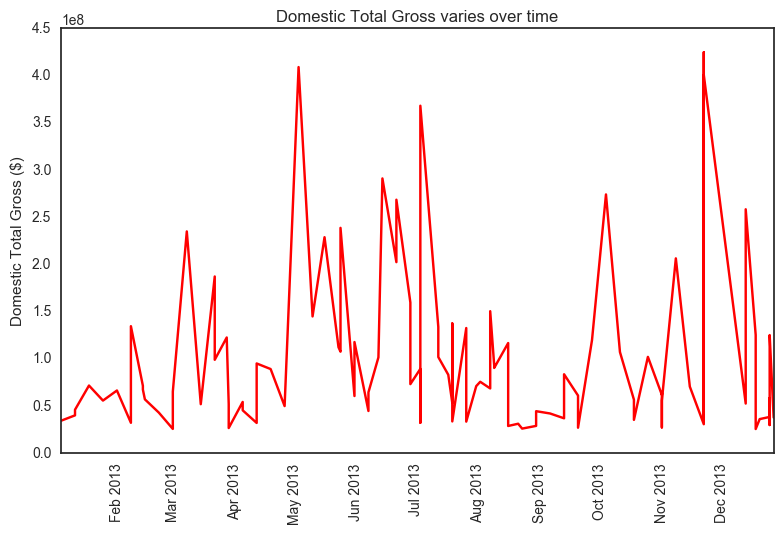

In [4]:
x1 = movies['ReleaseDate']
y1 = movies['DomesticTotalGross']

fig1 = plt.plot_date(x=x1, y=y1, fmt='r-')

plt.title('Domestic Total Gross varies over time')

plt.xticks(rotation='vertical')

plt.ylabel('Domestic Total Gross ($)')

plt.tight_layout();

#### Challenge 2

Plot runtime vs. domestic total gross.

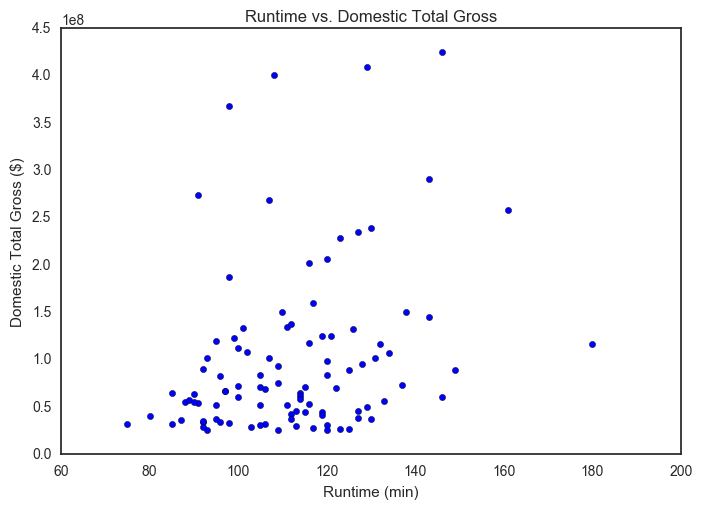

In [5]:
x2 = movies['Runtime']
y2 = movies['DomesticTotalGross']

fig2 = plt.scatter(x=x2, y=y2)

plt.title('Runtime vs. Domestic Total Gross')

plt.xlabel('Runtime (min)')
plt.ylabel('Domestic Total Gross ($)')

plt.show();

#### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [6]:
rating = movies.groupby(by='Rating', as_index=False).mean()[['Rating', 'DomesticTotalGross']]

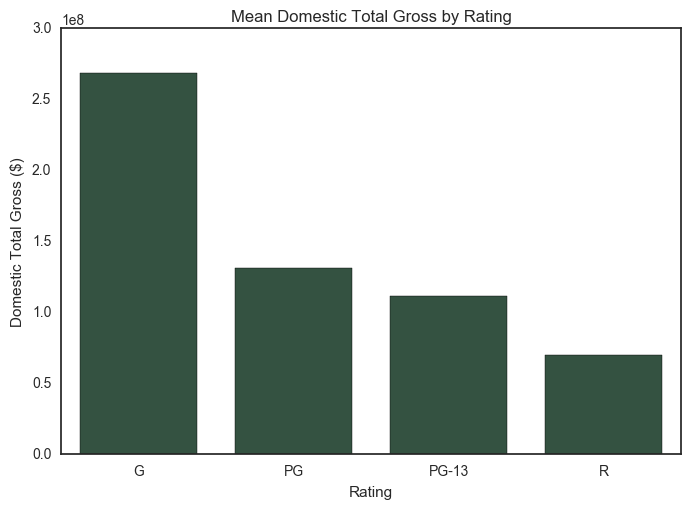

In [7]:
index = np.arange(len(rating))
gross = rating['DomesticTotalGross']

fig2 = plt.bar(left=index,
               height=gross,
               tick_label=rating['Rating'],
               width = 0.75,
               align = 'center'
              )

plt.title('Mean Domestic Total Gross by Rating')

plt.xlabel('Rating')
plt.ylabel('Domestic Total Gross ($)')

plt.show();

#### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

In [8]:
g = movies[movies['Rating'] == 'G']
pg = movies[movies['Rating'] == 'PG']
pg13 = movies[movies['Rating'] == 'PG-13']
r = movies[movies['Rating'] == 'R']

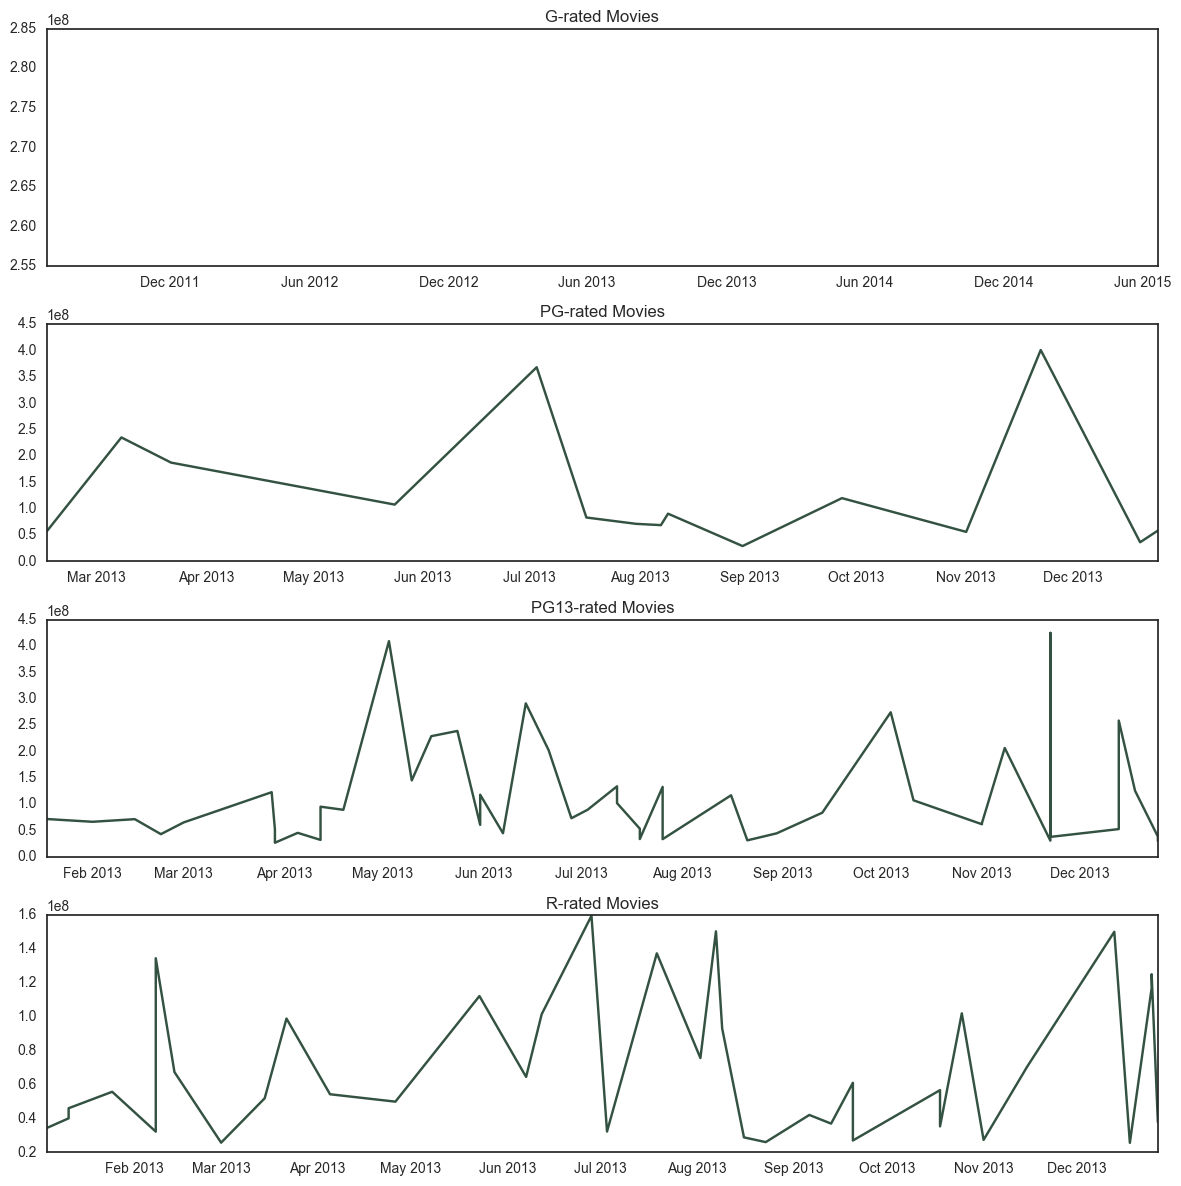

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(12, 12))

ax[0].plot(g['ReleaseDate'], g['DomesticTotalGross'])
ax[0].set_title('G-rated Movies')

ax[1].plot(pg['ReleaseDate'], pg['DomesticTotalGross'])
ax[1].set_title('PG-rated Movies')

ax[2].plot(pg13['ReleaseDate'], pg13['DomesticTotalGross'])
ax[2].set_title('PG13-rated Movies')

ax[3].plot(r['ReleaseDate'], r['DomesticTotalGross'])
ax[3].set_title('R-rated Movies')

plt.tight_layout();

#### Challenge 5

What director in your dataset has the highest gross per movie?

In [10]:
movies.groupby(by='Director', as_index=False).mean()[['Director', 'DomesticTotalGross']].sort_values(by='DomesticTotalGross').head(1)

,Director,DomesticTotalGross
83,Spike Jonze,25568251.0


#### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [11]:
movies['Month'] = movies['ReleaseDate'].map(lambda x: x.month)

In [12]:
months = movies.groupby(by='Month', as_index=False).mean()[['Month', 'DomesticTotalGross']]

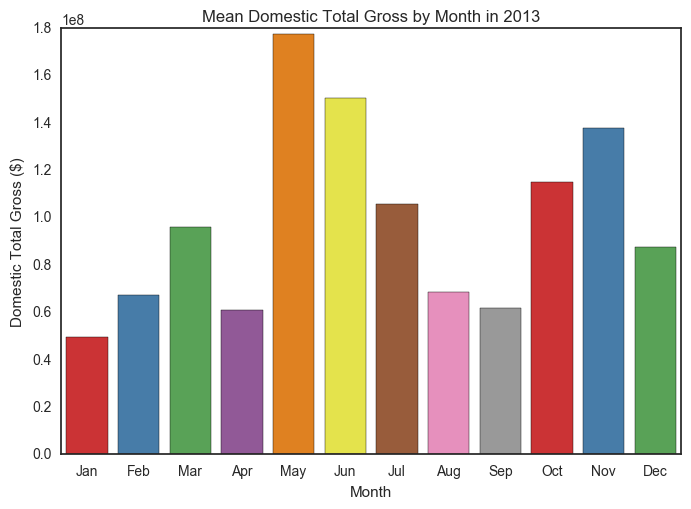

In [13]:
index = months['Month']
gross = months['DomesticTotalGross']

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

'''fig2 = plt.bar(left=index,
               height=gross,
               tick_label=month_names,
               width = .75,
               align = 'center'
              )
'''

fig6 = sns.barplot(index, gross, palette='Set1')

fig6.set(xticklabels = month_names)

plt.title('Mean Domestic Total Gross by Month in 2013')

plt.xlabel('Month')
plt.ylabel('Domestic Total Gross ($)')

plt.show();